# Project 3: Cars4U Project

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


Objective

1.	Explore and visualize the dataset.
2.	Build a linear regression model to predict the prices of used cars.
3.	Generate a set of insights and recommendations that will help the business.

Data Dictionary 

1.	S.No. : Serial Number
2.	Name : Name of the car which includes Brand name and Model name
3.	Location : The location in which the car is being sold or is available for purchase Cities
4.	Year : Manufacturing year of the car
5.	Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6.	Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7.	Transmission : The type of transmission used by the car. (Automatic / Manual)
8.	Owner : Type of ownership
9.	Mileage : The standard mileage offered by the car company in kmpl or km/kg
10.	Engine : The displacement volume of the engine in CC.
11.	Power : The maximum power of the engine in bhp.
12.	Seats : The number of seats in the car.
13.	New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14.	Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)
 


## Import Libraries

In [1]:
# Import necessary libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


<font color=darkblue>
    
# Loading and exploring the data


In [2]:
df = pd.read_csv("C:/Users/Konto/Documents/ESTUDOS/Texas university/BEST OF PHYTON/used_cars_data.csv", engine="python")

# The Data has a lot of information which provide us some security about deleting or changing values
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.") 

There are 7253 rows and 14 columns.


In [3]:
np.random.seed(8)  
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [4]:
df.info()
# Serial Number is the same as the index column. No need to do analysis on this column, since it does not provide valuable information
# Name is a string and has many different values within the data....column to be split (Brand, Label) and analysed
# Location, Fuel Type, Transmission, Owner_Type are variables with few unique values, they can be treated as strings. 
# Mileage, Engine, Power, Seats, Price need to be aligned as numerical values with the same 'standards'
# New_Price column to be deleted since it has over 85% of missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
df.isnull().sum() # columns missing values
# As mentioned before column New_Price will be deleted.
# After some transformation from object to numerical, we will to do further adjustments.
# The Mileage, Engine and Power rows with missing data can be deleted, since there are few rows.

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [6]:
num_missing = df.isnull().sum(axis=1) # rows missing values
num_missing.value_counts()
# The rows with one missing values are probably found in the column New_Price ,while the rows with two missing values in column New_Price and Price.

1    5335
2    1048
0     823
4      36
5      10
3       1
dtype: int64

In [7]:
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()
df[num_missing == 4].sample(n=10)
# The columns Engine, Power, Seats can be easily excluded from the data set, when values are missing. Most of them lack information all together. 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0 kmpl,NaN,NaN,NaN,NaN,11.99
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3 kmpl,NaN,NaN,NaN,NaN,2.60
2325,2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,4.70
4577,4577,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.48 kmpl,NaN,NaN,NaN,NaN,13.85
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
2780,2780,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.60
3520,3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48 kmpl,NaN,NaN,NaN,NaN,14.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88
3522,3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.66


In [8]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')        

For the rows with exactly 1 missing values, NAs are found in:
Mileage         1
New_Price    5152
Price         182
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Mileage         1
Seats           6
New_Price    1048
Price        1041
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Seats        1
New_Price    1
Price        1
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine       36
Power        36
Seats        36
New_Price    36
dtype: int64



For the rows with exactly 5 missing values, NAs are found in:
Engine       10
Power        10
Seats        10
New_Price    10
Price        10
dtype: int64





In [9]:
df.Location.value_counts()
# City categorical values well distributed 

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [10]:
df.Fuel_Type.value_counts()
# Fuel type variable has only few data for CNG, LPG and Electric, which will not provide reliable information about these fuel types.
# Indian market is also not mature enough for these Fuel Types.
# I will delete these rows later

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [11]:
df.Transmission.value_counts()
# Enough information about transmission variables

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [12]:
df.Owner_Type.value_counts()
# Owner_type has large number of data on First and Second, though few data sets on other variables. 
# I will delete the rows for 'Fourth & Above' later

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [13]:
df.Seats.value_counts()
# Enough information about Seats values, but there is one observation for seats zero, which makes no sense.

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

<font color=darkblue>
&nbsp;

# Processing columns
### Changing file name

In [14]:
CARS = df.copy() #I prefer to change the file name because if I test different processing,I dont have to run everything again, just his piece downward.

<font color=darkblue>
&nbsp;
    
### Droping columns, missing values and duplicates

In [15]:
# Column New_Price: Since this column has more than 85% of the data missing, the information is no longer reliable
# The use of this column will generate incorrect results to the model, as it is artificially inflating the model.
CARS.drop(['New_Price','S.No.'], axis=1, inplace=True)

In [16]:
# since we have enough data, it is possible to remove the rows of data which have missing value(s) seens above
CARS = CARS.dropna()

In [17]:
CARS.drop_duplicates(inplace=True)

In [18]:
CARS.info() # after droping null values and duplicates, the data still has enough values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


<font color=darkblue>
&nbsp;

### Transforming columns with strings into numerical values


In [19]:
# Transform the Column Engine into Float. No need to make calculations, since all measures are in "CC"
def Mil(Engine):
    if isinstance(Engine, str):
        return float(Engine.replace('CC', ''))
    else:
        return np.nan

col_transforms = {
    'Engine': Mil
}

for k,v in col_transforms.items():
    CARS[k] = CARS[k].map(v)

In [20]:
# Transform the Column Power into Float. No need to make calculations, since all measures are in "bhp"

CARS['Power'] = CARS['Power'].str.replace('bhp', '').str.replace('null','')
CARS['Power'] = pd.to_numeric(CARS['Power'], errors='coerce')


In [21]:
# Transform the Column Mileage into Float. No need to make calculations, since measures are comparable.
CARS['Mileage'] = CARS['Mileage'].str.replace('kmpl', '').str.replace('km/kg','')
CARS['Mileage'] = pd.to_numeric(CARS['Mileage'], errors='coerce')

In [22]:
# All necessary columns are numerical, but the column Power lost some information due to transformation.
CARS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


<font color=darkblue>
&nbsp;

# Exploratory Data Analysis and Data Treatment

In [23]:
cars = CARS.copy()

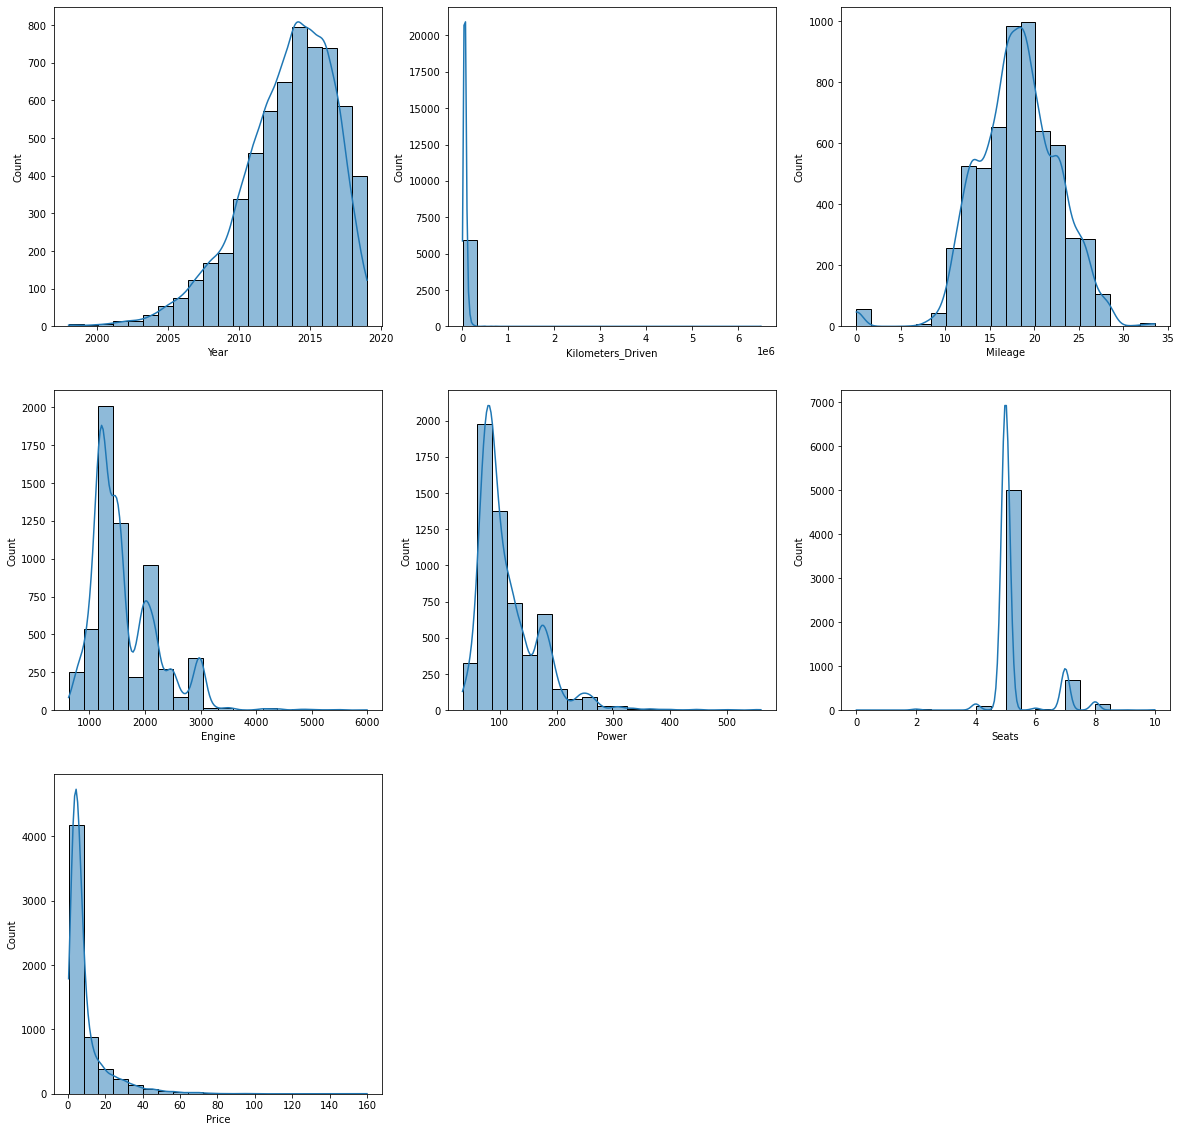

In [24]:
# lets plot histogram of all numerical variables

all_col = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 20))

for i in range(len(all_col)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cars[all_col[i]], bins = 20, kde=True)  # you can comment the previous line and run this one to get distribution curves

plt.show()

Kilometers_Driven and Price have very skewed data to the right due to few outliers, which can be seem more clearly below.

Engine and Power are also skewed to the right, but a bit less. Year is skewed to the left.

Seats shows an extremely number of data at 5 and very few in other values.


<AxesSubplot:>

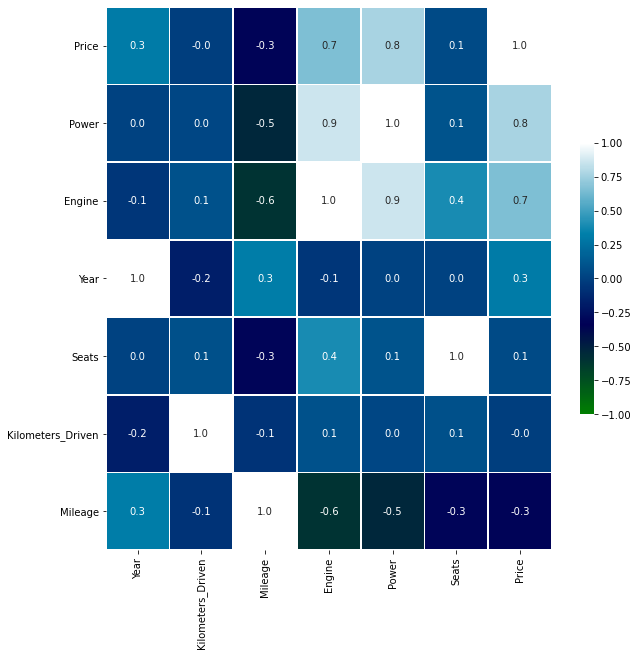

In [25]:
# Correlation is much higher between Price/Power, as well as Price/Engine
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
corr = (
    cars[numeric_columns].corr().sort_values(by=["Price"], ascending=False)
)  

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr,
    cmap="ocean",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

The correlation graph shows that the price has higher correlation with Engine and Power.

While Engine and Power have almost perfect correlation. That implies a Multicolinearity between these variables and will affect the VIF. 

One of the variables can be deleted before the statistical analysis or during the analysis. I will delet Engine, because it has a lower correlation with price and the VIF is higher.

All other correlations are smaller and there are few negative correlations.


In [26]:
def histogram_boxplot(feature, figsize=(10, 6), bins=None):
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

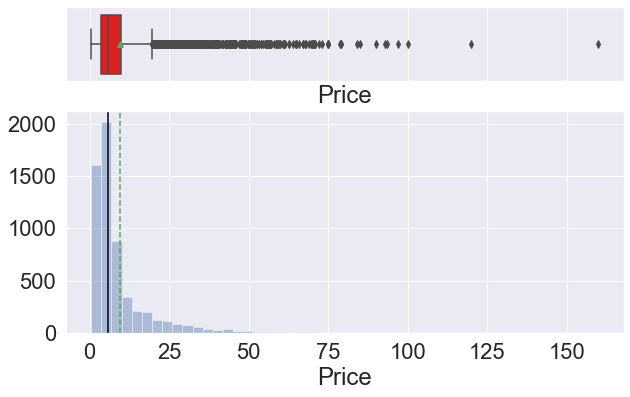

In [27]:
histogram_boxplot(cars["Price"])
# The price is skiwed to the right. There are a lot of outliers in the data. 

In [28]:
cars['Price'].describe()
# Mean, Median and Mode are very distant. Hence the data has a huge spread itself (0.44 - 160), the dispersion values reflect this.

count    5975.000000
mean        9.501647
std        11.205736
min         0.440000
25%         3.500000
50%         5.650000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [29]:
cars['Price'].mode()

0    4.5
dtype: float64

quartiles = np.quantile(cars['Price'][cars['Price'].notnull()], [.25, .75])
power_Xiqr = 5 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 5*IQR = {power_Xiqr}')
outlier_PRICE = cars.loc[np.abs(cars['Price'] - cars['Price'].median()) > power_Xiqr, 'Price']
outlier_PRICE.count()

<font color=red>
&nbsp;


### Based on several tests made for the statistical model, the best solution turned out to be a level of 5 x IQR for Outliers acceptance.
### Also different analysis done in all variables and only in the three 'extreme' variables showed that the statistical model worked better for the 3 extremes.
### Therefore all other values above this level for the three variables will be deleted.

cars.drop(outlier_PRICE.index, axis=0, inplace=True)

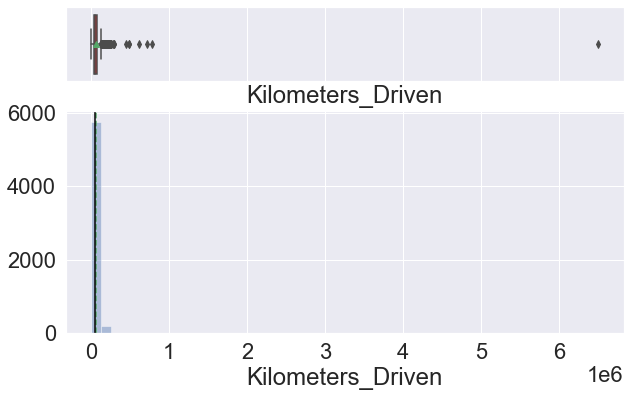

In [30]:
histogram_boxplot(cars["Kilometers_Driven"])

In [31]:
desc = cars['Kilometers_Driven'].describe()
desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
desc.iloc[1:] = desc.iloc[1:].map('{:.2f}'.format)
print(desc)

count          5975
mean       58674.31
std        91558.51
min          171.00
25%        33908.00
50%        53000.00
75%        73000.00
max      6500000.00
Name: Kilometers_Driven, dtype: object


In [32]:
cars['Kilometers_Driven'].mode()

0    60000
dtype: int64

quartiles = np.quantile(cars['Kilometers_Driven'][cars['Kilometers_Driven'].notnull()], [.25, .75])
power_iqr = 5 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 5*IQR = {power_iqr}')
outlier_KD = cars.loc[np.abs(cars['Kilometers_Driven'] - cars['Kilometers_Driven'].median()) > power_iqr, 'Kilometers_Driven']
outlier_KD.count()

cars.drop(outlier_KD.index, axis=0, inplace=True)

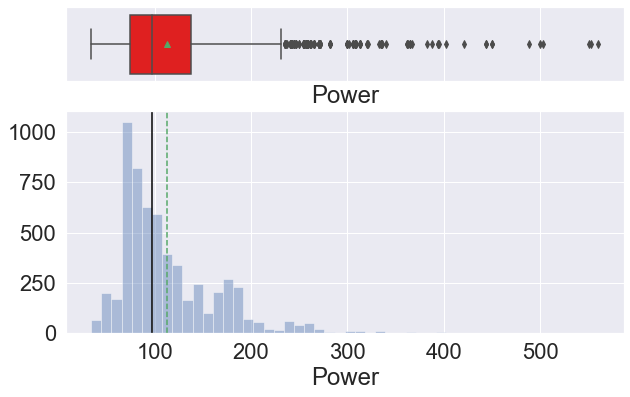

In [33]:
histogram_boxplot(cars["Power"])

In [34]:
cars['Power'].describe()

count    5872.000000
mean      113.276894
std        53.881892
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

In [35]:
cars['Power'].mode()

0    74.0
dtype: float64

quartiles = np.quantile(cars['Power'][cars['Power'].notnull()], [.25, .75])
power_iqr = 5 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 5*IQR = {power_iqr}')
outlier_powers = cars.loc[np.abs(cars['Power'] - cars['Power'].median()) > power_iqr, 'Power']
outlier_powers.count()

cars.drop(outlier_powers.index, axis=0, inplace=True)

In [36]:
cars.info() # the number of entries decrease from ca. 5200 to 4767, still enough to continue 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


In [37]:
# Split the Name Column into Brand and Model
Brand_Model = cars["Name"].str.split(" ", n=1, expand = True)
cars["Brand"] = Brand_Model[0]
cars["Model"] = Brand_Model[1]
cars.drop(['Name'], axis=1, inplace=True)
cars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [38]:
cars['Brand'].unique()
# Below we can see that the Brand "Land Rover" just overtook "Land", while the Brand Isuzu appeared in two different forms. We can fix it.

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [39]:
cars['Brand'].replace(to_replace ='Land', value ='Land-Rover', inplace = True) # Some names are not properly taken

In [40]:
cars['Brand'].replace(to_replace ='ISUZU', value ='Isuzu', inplace = True) #The same name appeared twice with different forms

In [41]:
cars['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land-Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [42]:
cars.Brand.value_counts()
# There are few Brands with less than ten cars in the data set. This will not be enought to provide reliable feedback.

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land-Rover         57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
Isuzu               3
Lamborghini         1
Smart               1
Ambassador          1
Bentley             1
Name: Brand, dtype: int64

# Now lets drop the Brands that do not have enough information
cars.drop(cars[cars['Brand'] == 'Isuzu'].index, inplace = True)
cars.drop(cars[cars['Brand'] == 'Force'].index, inplace = True)
cars.drop(cars[cars['Brand'] == 'Porsche'].index, inplace = True)
cars.drop(cars[cars['Brand'] == 'Ambassador'].index, inplace = True)
cars.drop(cars[cars['Brand'] == 'Smart'].index, inplace = True)


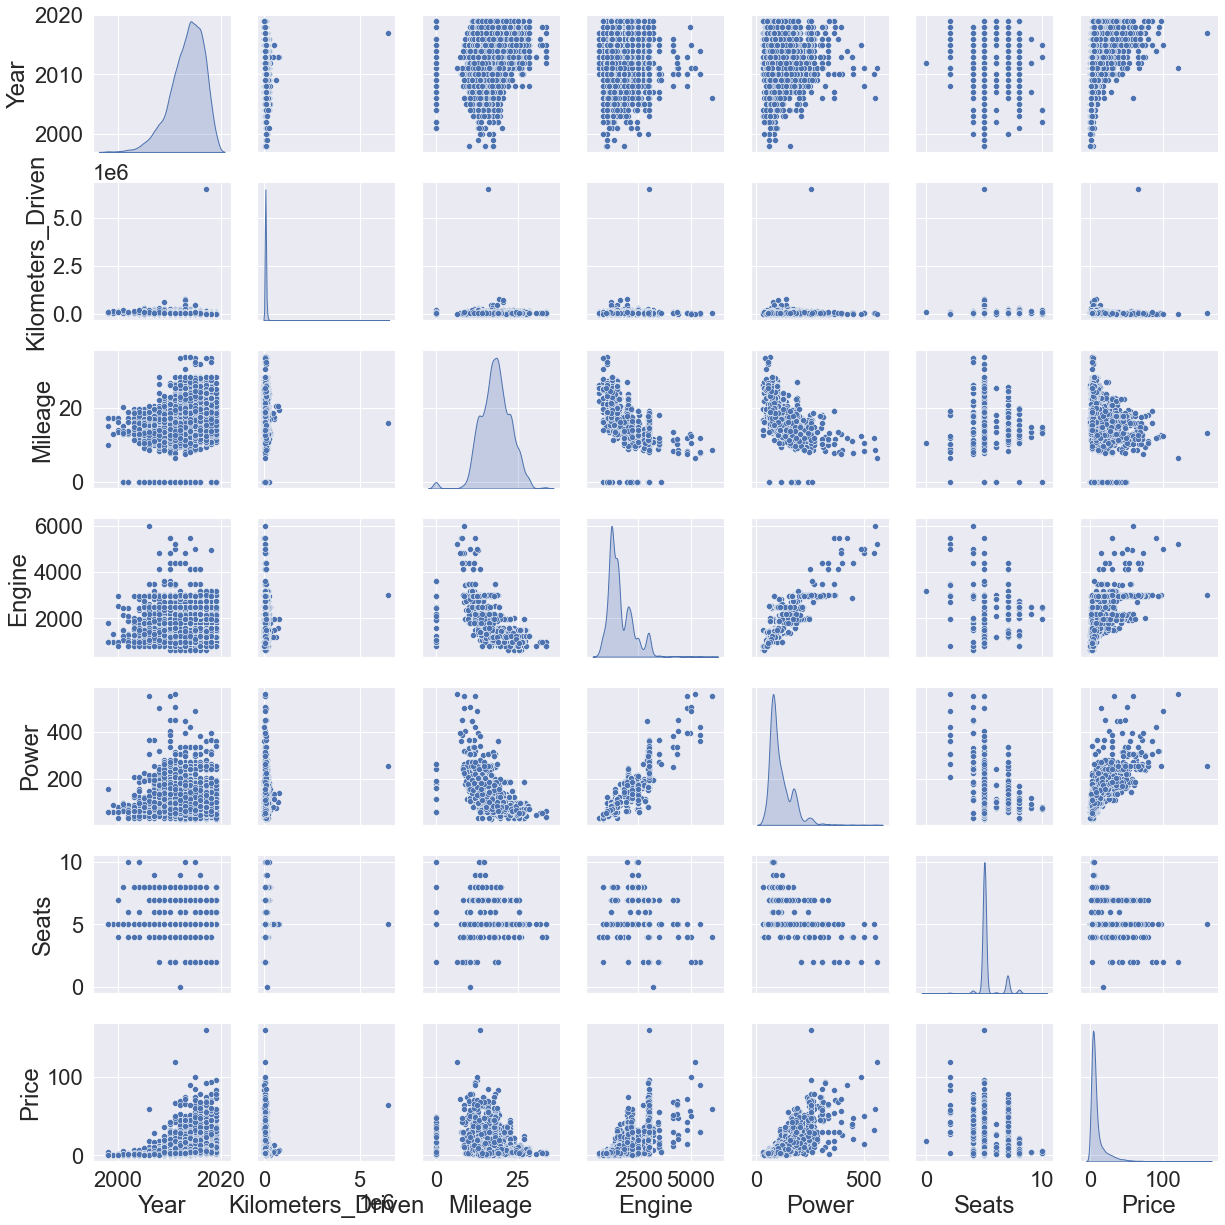

In [43]:
Plots =  cars.iloc[:, 0: ]
sns.pairplot(Plots, diag_kind='kde') 

<AxesSubplot:>

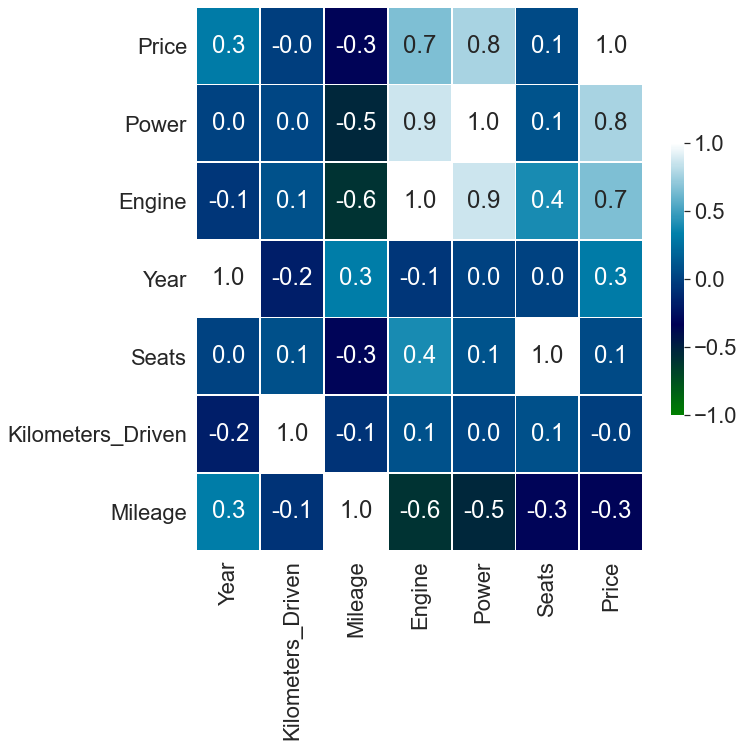

In [44]:
# Correlation is much higher between Price/Power, as well as Price/Engine
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
corr = (
    cars[numeric_columns].corr().sort_values(by=["Price"], ascending=False)
)  

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr,
    cmap="ocean",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

After Data Treatment multicolinearity decreased, but we still need to keep an eye on it

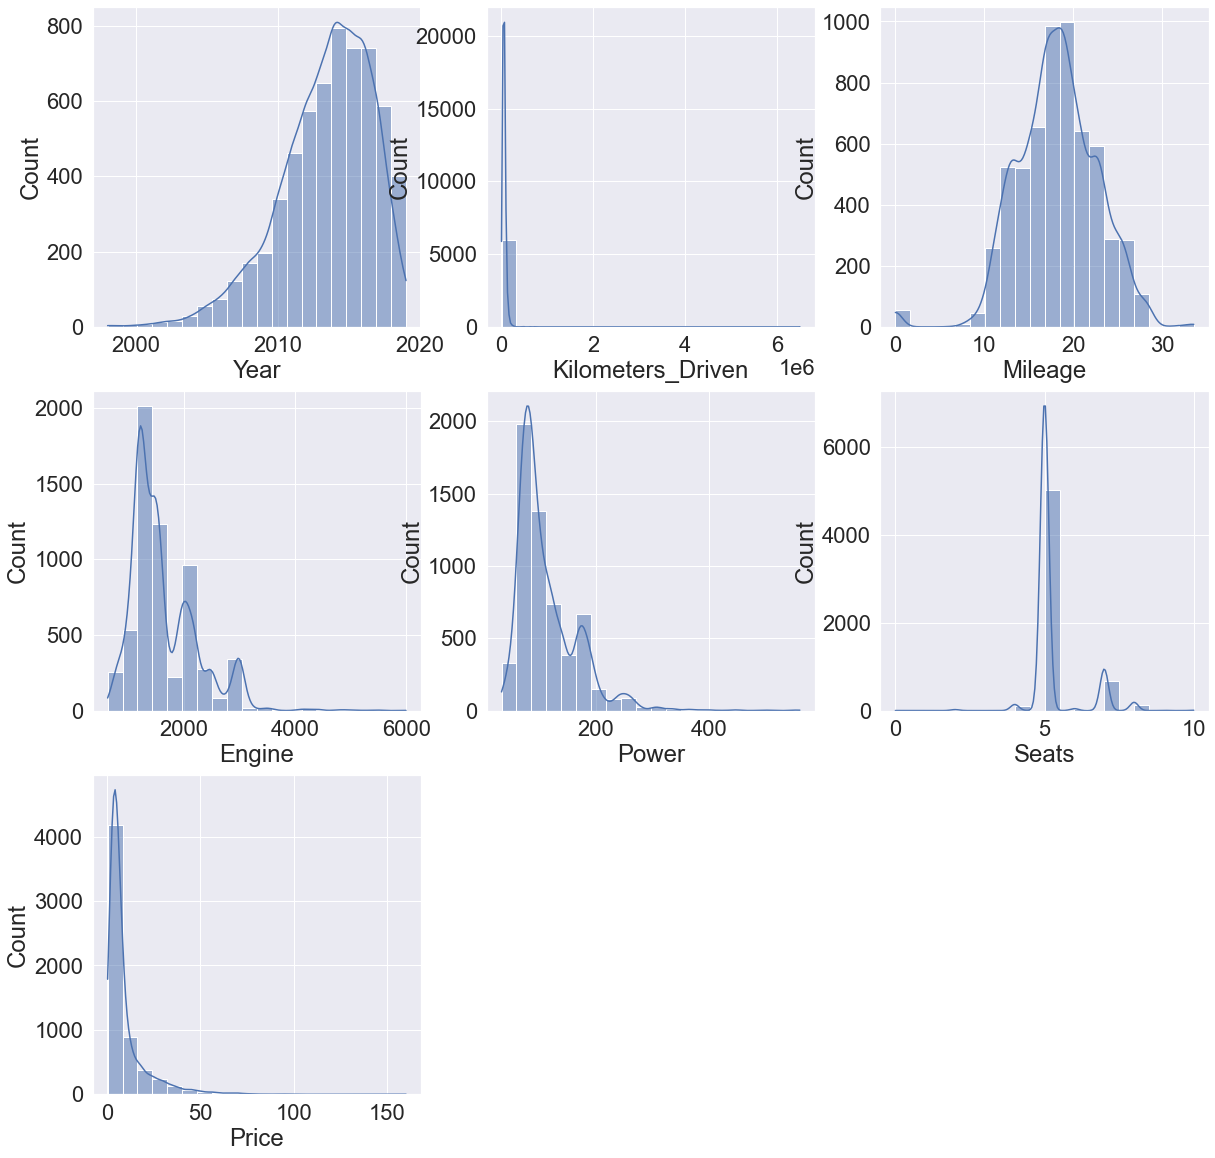

In [45]:
all_col = cars.select_dtypes(include=np.number).columns.tolist()
#all_col.remove("Year")
plt.figure(figsize=(20, 20))

for i in range(len(all_col)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(cars[all_col[i]], bins = 20, kde=True)  # you can comment the previous line and run this one to get distribution curves

plt.show()

After doing Data Treatment the variables have a better distribution, but still not normal distribution as they are still a bit skewed and some have huge gaps in some intervals.

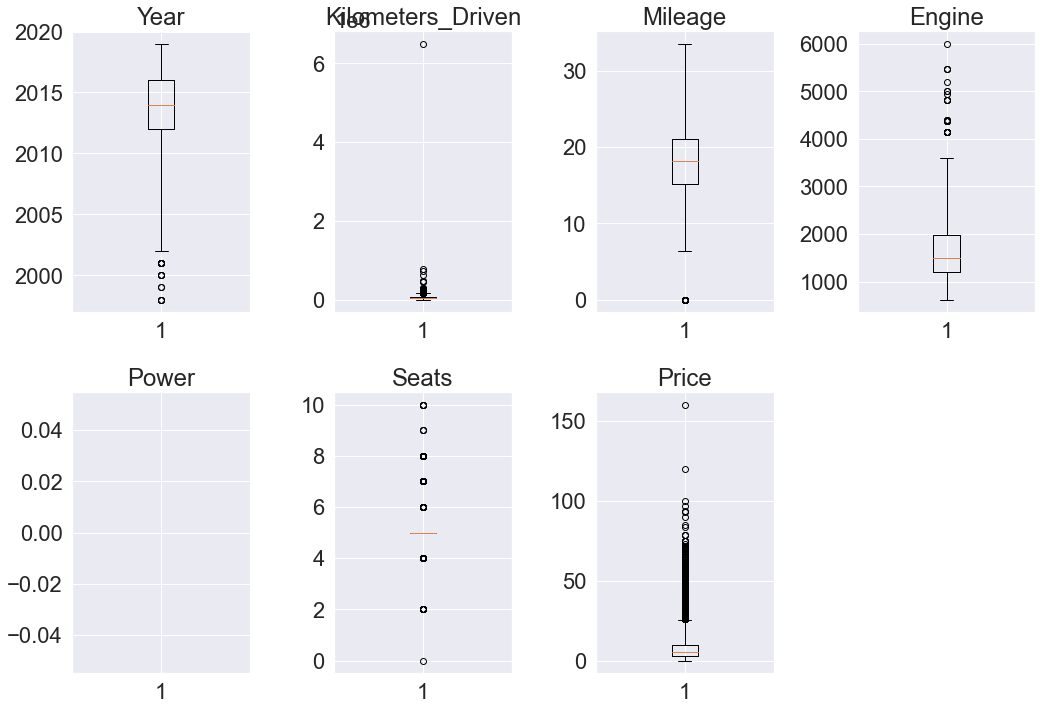

In [46]:
# We have already noticed some outliers in previous analysis, but these graphs show that almost all 
plt.figure(figsize=(15, 20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(cars[variable], whis=2.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Here is visually clear that the number of outliers decreased

<font color=darkblue>
&nbsp;

# Treating Data further
There are still some Data that can be improved to provide us more reliable information about the cars  price.


In [47]:
# Now lets drop Fourth & Above Onwer Type due to the small number of observations
cars.drop(cars[cars['Owner_Type'] == 'Fourth & Above'].index, inplace = True)

In [48]:
# Now lets drop Fuel Type that have no mature market
cars.drop(cars[cars['Fuel_Type'] == 'CNG'].index, inplace = True)
cars.drop(cars[cars['Fuel_Type'] == 'LPG'].index, inplace = True)
cars.drop(cars[cars['Fuel_Type'] == 'Electric'].index, inplace = True)

In [49]:
# Now lets drop the cars without seats, since it is only one observation and very rare (never seen a car without seat!). 
#Cars with 9 or 10 seats may be vans or combis, which is possible.
cars.drop(cars[cars['Seats'] == 0 ].index, inplace = True)

In [50]:
# Lets fill the missing Data on Power with Median to avoid distribution influences
cars['Power'].fillna(cars['Power'].median(), inplace=True) 

In [51]:
cars.isna().sum() # no missing data

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [52]:
cars.info() # still enough observations for statistical analysis 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5900 entries, 1 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5900 non-null   object 
 1   Year               5900 non-null   int64  
 2   Kilometers_Driven  5900 non-null   int64  
 3   Fuel_Type          5900 non-null   object 
 4   Transmission       5900 non-null   object 
 5   Owner_Type         5900 non-null   object 
 6   Mileage            5900 non-null   float64
 7   Engine             5900 non-null   float64
 8   Power              5900 non-null   float64
 9   Seats              5900 non-null   float64
 10  Price              5900 non-null   float64
 11  Brand              5900 non-null   object 
 12  Model              5900 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 645.3+ KB


<font color=magenta>
    
    
# Log Transformation of variables
Since we are still not sure if the outliers transformation will provide a quality statistical model, I will consider a second analysis including Square root transformation for some variables. I did not perform a log transformation because the variable Mileage will have an infinite warning.


cars_Log = cars.copy() # save a file for log

Price_trans = cars_Log['Price'].transform([np.sqrt, np.log])
Price_trans.hist(bins=20, layout = (2,2), edgecolor='k', figsize=(10,8))

KD_trans = cars_Log['Kilometers_Driven'].transform([np.sqrt, np.log])
KD_trans.hist(bins=20, layout = (2,2), edgecolor='k', figsize=(10,8))

Pw_trans = cars_Log['Power'].transform([np.sqrt, np.log])
Pw_trans.hist(bins=20, layout = (2,2), edgecolor='k', figsize=(10,8))

Mi_trans = cars_Log['Mileage'].transform([np.sqrt])
Mi_trans.hist(bins=20, layout = (2,2), edgecolor='k', figsize=(10,8))

<font color=magenta>
&nbsp;
    
### transforming the variables => Square Root prefered since Log for two variables show as infinite values.

cars_Log['Pricesqrt'] = cars_Log['Price'].transform([np.sqrt])

cars_Log['KDsqrt'] = cars_Log['Kilometers_Driven'].transform([np.sqrt])

cars_Log['MILsqrt'] = cars_Log['Mileage'].transform([np.sqrt])

cars_Log['Pwsqrt'] = cars_Log['Power'].transform([np.sqrt])

cars_Log.info()

<font color=green>
&nbsp;
    
# Data Modelling without LOG Transformation

In [53]:
# defining X and y variables
X = cars.drop(["Price",'Model'], axis=1)
y = cars[["Price"]]
print(X.shape)
print(y.shape)

(5900, 11)
(5900, 1)


In [54]:
# creating dummy variables with the categorical columns
X = pd.get_dummies(X, columns=['Transmission', 'Owner_Type', 'Brand','Fuel_Type','Location'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land-Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Petrol,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
1,2015,41000,19.67,1582.0,126.20,5.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,2013,86999,23.08,1461.0,63.10,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [55]:
print(X.shape)
print(y.shape)

(5900, 49)
(5900, 1)


In [56]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<font color=darkblue>
&nbsp;
    
# Evaluate the Model

In [57]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [58]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,1.080836
Kilometers_Driven,0.000003
Mileage,-0.141469
Engine,0.001794
Power,0.080537
Seats,-0.163327
Transmission_Manual,0.016596
Owner_Type_Second,-0.524591
Owner_Type_Third,1.652316
Brand_Audi,2.107774


In [59]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [60]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,2.942934,58.535521,5.417917,0.775453


In [61]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,2.834435,57.655575,5.073359,0.779909


**Observations**

- The training and testing scores are 84% and 82% respectively, and both the scores are comparable. Hence, the model is a good fit.

- R-squared is 0.82 on the test set, i.e., the model explains 82% of total variation in the test dataset. So, overall the model is very satisfactory.

- MAE indicates that our current model is able to predict Prices within a mean error of 1.9 INR Lakhs.

- MAPE value is very high, since predicted values have high variance. This issue implies that the MAPE should be used carefully if there are extremely small observations and directly motivates the last and often ignored the weakness of the MAPE.

<font color=darkblue>
&nbsp;
    
# Linear Regression with Statsmodel

In [62]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     287.5
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:34:37   Log-Likelihood:                -12839.
No. Observations:                4130   AIC:                         2.578e+04
Df Residuals:                    4080   BIC:                         2.609e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2169.7673    

**Observations**

- There are more Negative values of the coefficient tha positive.

- Negative values of the coefficient show that *Price* decreases with the increase of corresponding attribute value.

-  In the entire set there are few attributes with p-value > 0.05. Hence, most attributes have p-value < 0.05 and are considered significant.

- Lets check multicollinearity, which will affect the p-values.


<font color=darkblue>
&nbsp;
    
# Checking Linear Regression Assumptions
TEST FOR MULTICOLLINEARITY

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multicol = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(Multicol))

VIF Scores: 

const                  658502.046229
Year                        1.712766
Kilometers_Driven           1.070522
Mileage                     3.123117
Engine                     10.221414
Power                       9.034944
Seats                       2.489458
Transmission_Manual         2.255031
Owner_Type_Second           1.174003
Owner_Type_Third            1.133256
Brand_Audi                230.511808
Brand_BMW                 256.031924
Brand_Bentley               2.073549
Brand_Chevrolet           121.009420
Brand_Datsun               14.184616
Brand_Fiat                 26.211614
Brand_Force                 4.047336
Brand_Ford                285.554336
Brand_Honda               548.525624
Brand_Hyundai             901.893091
Brand_Isuzu                 4.047794
Brand_Jaguar               41.546278
Brand_Jeep                 16.220963
Brand_Lamborghini           2.067631
Brand_Land-Rover           58.376154
Brand_Mahindra            263.284491
Brand_Maruti            

<font color=darkblue>
&nbsp;
    
    
### Delete VIF for non dummy variables higher than 5

In [64]:
# As we have mentioned several times, Engine is highly correlated to Power, therefore to price. This overfits the model. We need to delete the variable.
X_train2 = X_train1.drop("Engine", axis=1)

Multicol2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(Multicol2))

VIF Scores: 

const                  647015.688803
Year                        1.701581
Kilometers_Driven           1.053598
Mileage                     2.863484
Power                       3.835958
Seats                       2.359152
Transmission_Manual         2.328067
Owner_Type_Second           1.189070
Owner_Type_Third            1.154953
Brand_Audi                162.308522
Brand_BMW                 184.268089
Brand_Bentley               2.100966
Brand_Chevrolet            85.831917
Brand_Datsun                9.169173
Brand_Fiat                 17.219692
Brand_Force                 4.069501
Brand_Ford                192.900751
Brand_Honda               384.651450
Brand_Hyundai             625.915320
Brand_Isuzu                 2.031295
Brand_Jaguar               30.656432
Brand_Jeep                 11.217384
Brand_Lamborghini           2.095748
Brand_Land-Rover           44.563883
Brand_Mahindra            198.281204
Brand_Maruti              664.962632
Brand_Mercedes-Benz     

In [65]:
# no changes in the statistical values
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     292.1
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:34:43   Log-Likelihood:                -12847.
No. Observations:                4130   AIC:                         2.579e+04
Df Residuals:                    4081   BIC:                         2.610e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2152.0499    

**Observations**

There are no significant changes from the previous observations.

<font color=darkblue>
    
# Check mean of residuals 

### mean of residuals is very close to zero

In [66]:
residual = olsres1.resid
np.mean(residual)

-9.097752091631791e-12

<font color=darkblue>
&nbsp;
    
# Test Linearity

### the model is showing signs of non-linearity
  => Log Transformation did not improve the situation (tested but not included), while Sqrt Transformation only a bit (still very curvy).

In [67]:
residual = olsres1.resid
fitted = olsres1.fittedvalues  # predicted values

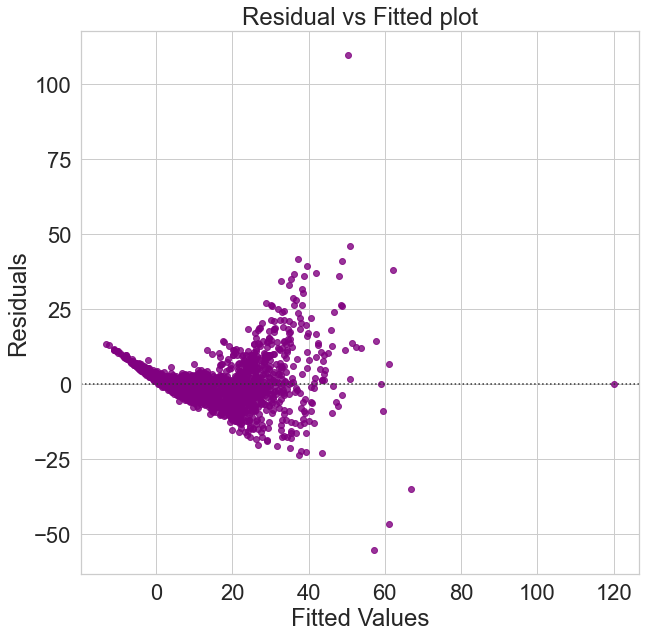

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.residplot(fitted, residual, color="purple", lowess=False)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

In [69]:
res_sqrt = np.sqrt(residual)
fit_sqrt = np.sqrt(fitted)

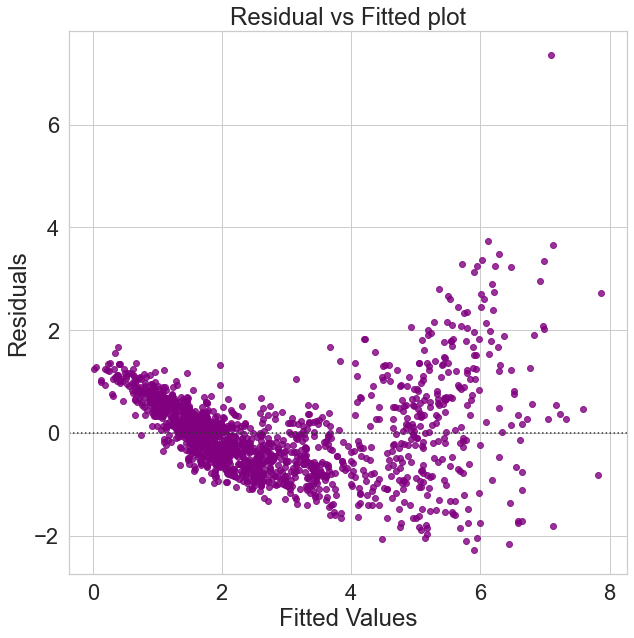

In [70]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.residplot(fit_sqrt, res_sqrt, color="purple", lowess=False)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

<font color=darkblue>
&nbsp;
    
# Test for normality
 
### Error terms/Residuals normally distributed

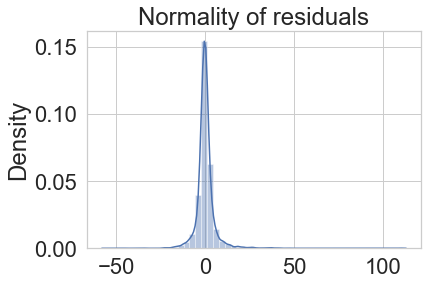

In [71]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

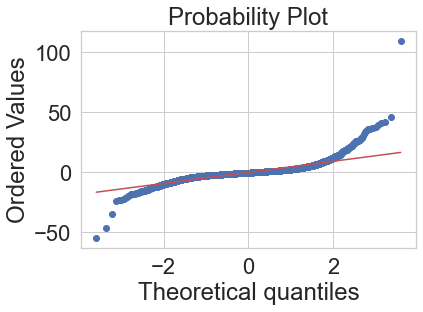

In [72]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

In [73]:
stats.shapiro(residual) 

ShapiroResult(statistic=0.7252854108810425, pvalue=0.0)

The residuals are not normal as per shapiro test, but as per QQ plot and distplot they are approximately normal. 

QQ plot shows between invertal -2,2 that the data behaves pretty normal, the deviations start by the values above those thresholds.

The higher variances outside of range -2 , 2 may have influenced shapiro test. Because in big data sets, even for small deviations, shapiro shows as not normal.

Hence we go with the plots and say that residuals are normal.

<font color=darkblue>
&nbsp;

# Test for Homoscedasticity

In [74]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)

[('F statistic', 0.8876099940424415), ('p-value', 0.9962868514347207)]

Since p-value > 0.05, we can say that the residuals are homoscedastic (variance of the residuals are symmetrically distributed across the regression line). This assumption is therefore valid in the data.

<font color=darkblue>
&nbsp;

# Predicting on the test data without sqrt transformation

In [75]:
X_train2.columns
X_train2.shape

(4130, 49)

In [76]:
X_test_final = X_test[X_train2.columns]

In [77]:
X_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Power,Seats,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land-Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Petrol,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
5860,1.0,2019,16392,16.55,105.00,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2011,1.0,2017,25000,25.17,53.30,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1790,1.0,2004,73500,13.00,90.00,5.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3850,1.0,2010,75014,21.10,73.90,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5511,1.0,2014,74624,20.00,68.05,5.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [78]:
X_test_final.shape

(1770, 49)

In [79]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(olsres1, X_train2.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,2.950236,58.22431,5.428699,0.774559


In [80]:
# Checking model performance on test set (seen 70% data)
print("Test Performance\n")
model_perf(olsres1, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,2.849385,57.693637,5.091499,0.778332


Now we can see that the model has low test and train RMSE and MAE, and both the errors are comparable. So, our model is not suffering from overfitting.

The model is able to explain 82% of the variation on the test set, which is very good.

The MAPE on the test is very high, which implies that the MAPE should be used carefully if there are extremely small observations (which is the case since we did not transform data). 

In [81]:
# let us print the model summary

olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     292.1
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:34:48   Log-Likelihood:                -12847.
No. Observations:                4130   AIC:                         2.579e+04
Df Residuals:                    4081   BIC:                         2.610e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2152.0499    

# **Because the Model with Sqrt transformation is more reliable, I will take conclusions from them**

<font color=green>
&nbsp;
    
# Data Modelling with SQRT Transformation

In [82]:
# This is an Squared Root Model, not a Log Model (nomenclature wrong).
Xl = cars_Log.drop(["Price",'Model', 'Pricesqrt', 'KDsqrt', 'MILsqrt', 'Pwsqrt', 'Engine'], axis=1)
yl = cars_Log[["Pricesqrt"]]
print(Xl.shape)
print(yl.shape)

NameError: name 'cars_Log' is not defined

In [ ]:
# creating dummy variables with the categorical columns
Xl = pd.get_dummies(Xl, columns=['Transmission', 'Owner_Type', 'Brand','Fuel_Type','Location'], drop_first=True)
Xl.head()

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split

Xl_train, Xl_test, yl_train, yl_test = train_test_split(
    Xl, yl, test_size=0.3, random_state=42
)

In [ ]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(Xl_train, yl_train)

In [ ]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, Xl_train, yl_train)

In [ ]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf(linearregression, Xl_test, yl_test)

In [ ]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
Xl = sm.add_constant(Xl)
Xl_train1, Xl_test, yl_train, yl_test = train_test_split(
    Xl, yl, test_size=0.3, random_state=42
)

olsmodl = sm.OLS(yl_train, Xl_train1)
olsresl = olsmodl.fit()
print(olsresl.summary())

**Observations identical with the previous model**

- There are more Negative values of the coefficient tha positive.

- Negative values of the coefficient show that *Price* decreases with the increase of corresponding attribute value.

-  In the entire set there are few attributes with p-value > 0.05. Hence, most attributes have p-value < 0.05 and are considered significant.

- Multicollinearity already eliminated with exclusion of engine.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multicoll = pd.Series(
    [variance_inflation_factor(Xl.values, i) for i in range(Xl.shape[1])], index=Xl.columns
)
print("VIF Scores: \n\n{}\n".format(Multicoll))

<font color=darkblue>
    
# Check mean of residuals 

### mean of residuals is very close to zero

In [ ]:
residuall = olsresl.resid
np.mean(residuall)

<font color=darkblue>
&nbsp;
    
# Test Linearity

### the model is also showing signs of non-linearity

In [ ]:
fittedl = olsresl.fittedvalues  # predicted values

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.residplot(fittedl, residuall, color="purple", lowess=False)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

<font color=darkblue>
&nbsp;
    
# Test for normality
 
### Error terms/Residuals normally distributed
Even though deviations were reduced, shapiro test failed.

In [ ]:
sns.distplot(residuall)
plt.title("Normality of residuals")
plt.show()

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(residuall, dist="norm", plot=pylab)
plt.show()

In [ ]:
stats.shapiro(residuall) 

As the previous data test, the residuals are not normal as per shapiro test, but as per QQ plot and distplot they are approximately normal. Hence we go with the plots and say that residuals are normal.

<font color=darkblue>
&nbsp;

# Test for Homoscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuall, Xl_train1)
lzip(name, test)

Since p-value > 0.05, we can say that the residuals are homoscedastic (variance of the residuals are symmetrically distributed across the regression line). This assumption is therefore valid in the data.

<font color=darkblue>
&nbsp;

# Predicting on the test data with sqrt transformation & final conclusions

Since our initial model did not change, we will use the results provided in the OLS Summary to do our conclusions.

First let me remind that there are a lot of boundries for this Model. The Min and Max values in the Data set shall be respected while making predictions about Prices. 

If you want to calculate the price of a used car from 1990, you better not use this model, because the min value in years is 1998.
For car 'age' (Years column) you have a range of 20 years to use, but anything above or below will not achieve the accuracy described above. The Company has to take a risk using this model.

The same goes for the Brands, if you want to calculate the Price of Porsche or Smart, this model is not the best fit. Since we have no observation on those Brands. As long as the calculations stick to the 'assumptions', the model 'garantees' the accuracy around 90%, otherwise, your 'accuracy' will decrease.

In [ ]:
cars_Log.describe()

In [ ]:
cars_Log.Brand.value_counts()

# Conclusions

Aware of the given Warnings, it is possible to conclude:

We need to square the coeficients, because the model was square rooted.

* Year, Power and Seats are the individual attributes that increase the price of the car

The attribute Year has a coef of 0.1329 , hence the price of the car increases by 0.1329² = 0.01766 for any increase in the year. Which is reasonable, because younger cars, have higher values. 


* Transmission_Manual, Owner second and third are individual attributes (X) that decrease the price of the car (y)

For every 1 unit increase in X, Y will dencrease by X Coef² in Lakhs.


* Dummy variables also have coeficientes that follow the same logic, which in some case would mean that certain car models and cities have positive effect on the price. Using these coeficientes, the company can position itself on the market with more accuracy and profitability.